# Project: Titanic - Machine Learning from Disaster

Predict survival on the Titanic

##### Kaggle link: https://www.kaggle.com/competitions/titanic/overview

Courtesy:
* https://www.kaggle.com/code/ccastleberry/titanic-cabin-features
* https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial
* https://www.kaggle.com/code/yassineghouzam/titanic-top-4-with-ensemble-modeling

## Problem Statement: Predict the survival from Titanic

Using the provided train and test data, we have to predict the `Surivived` column where `1` means `Survived` and `0` means `Not Survived`.

**Train Data** : Train data has features columns and target variable (`Survived`) column.

**Test Data** : Test only has features columns and do not have the `Survived` column. We will not going to using test data while building our model and also to check accuracy during testing of multiple models. Only use test data for final prediction. (This will prevent overfitting of ML models till some extent.)

**Submission Data** : We have to submit our prediction in this format. It will have `PassengerId` and `Survived` column.

## Task to perform to solve the problem:
* Exploratory Data Analysis
* Data Preprocessing & Feature Engineering
* Data Preparation for Machine Learning
* Implement Machine Learning Models and compare accuracy
* Ensembling (Stacking of multiple ML models)
* Final Prediction using final ML model with Test Data

# Load required packages

In [1]:
# Import data wrangling packages
import pandas as pd
import numpy as np
import missingno as mn
from collections import Counter
import warnings
from time import process_time

# Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns


# ML metrics packages
from sklearn.metrics import confusion_matrix

# ML model building packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

warnings.filterwarnings("ignore");

# Import and read the data

In [2]:
# Importing 3 datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)
print('Submission data shape: ', gender_submission.shape)

Training data shape:  (891, 12)
Testing data shape:  (418, 11)
Submission data shape:  (418, 2)


**Note:** We can see that training data has all the features columns and target data (`Survived`). In testing data, we have all the feature variable but not the target variable (`Survived`) which we have to predict using our machine learning model. Submission data is the format in which we have to submit the predictions in kaggle.

# Exploratory Data Analysis

Doing univariate analysis, bivariate analysis, statistical analysis and coorelation of features with target variable.

### Data types, summary statistics, missing data

In [7]:
# Summary info of the data
print('Summary information of train data')
display(train.info())
print('---'*30)
print('Summary information of test data')
display(test.info())

Summary information of train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

------------------------------------------------------------------------------------------
Summary information of test data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

In [8]:
# Summary statistics
print('Summary statistics for train data')
display(train.describe())
print('---'*30)
print('Summary statistics for test data')
display(test.describe())

Summary statistics for train data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


------------------------------------------------------------------------------------------
Summary statistics for test data


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
# Missing data
print('Missing values in train data')
display(train.isnull().sum().sort_values(ascending=False))
print('---'*30)
print('Missing values in test data')
display(test.isnull().sum().sort_values(ascending=False))

Missing values in train data


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

------------------------------------------------------------------------------------------
Missing values in test data


Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [10]:
# Missing value percentage
print('Percentage of missing values in train data')
display(round((train.isnull().sum() / train.shape[0])*100, 2))
print('---'*30)
print('Percentage of missing values in test data')
display(round((test.isnull().sum() / test.shape[0])*100, 2))

Percentage of missing values in train data


PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

------------------------------------------------------------------------------------------
Percentage of missing values in test data


PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

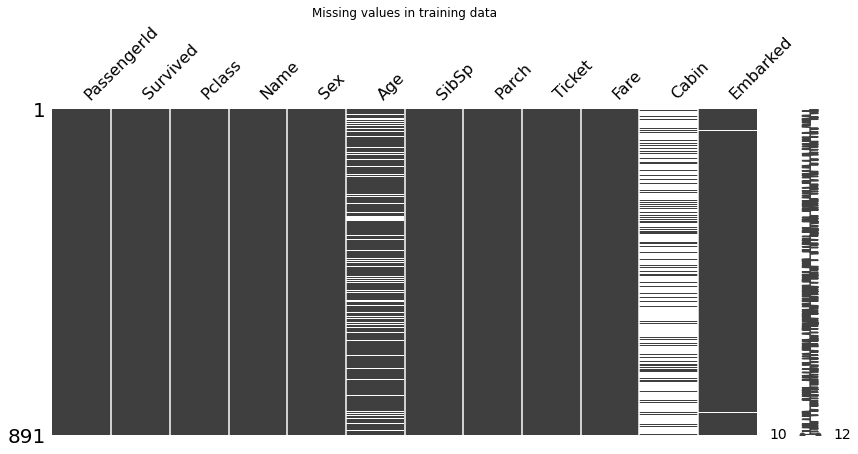

In [11]:
# Visualize missing data training set
_ = mn.matrix(train, figsize=(14,6))
_ = plt.title('Missing values in training data')
plt.show()

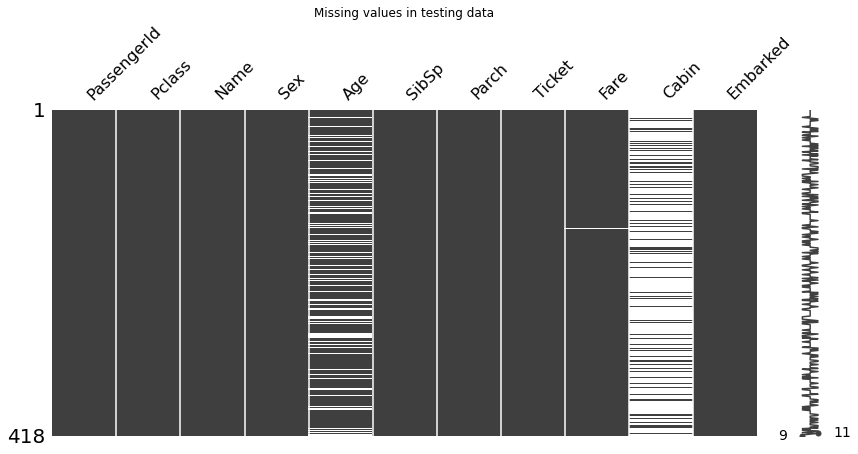

In [12]:
# Visualize missing data testing set
_ = mn.matrix(test, figsize=(14,6))
_ = plt.title('Missing values in testing data')
plt.show()

**Note:** In training set `Age, Cabin, Embarked` has missing values and in testing set `Age, Fare, Cabin` has missing values.

### Explore Target Variable

***Explore `Survived` Column***

It is Survival data of passengers. Key `0 = No and 1 = Yes`

Total passenger onboard:  891
Total passenger Survived:  342
Percentage of passenger Survived:  0.3838383838383838


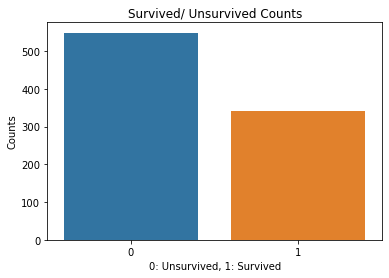

In [13]:
# Total passenger
total_passenger = len(train.Survived)
print('Total passenger onboard: ', total_passenger)

# Total Survived
total_survived = sum(train.Survived)
print('Total passenger Survived: ', total_survived)

# Percentage of Survived
print('Percentage of passenger Survived: ', (total_survived/total_passenger))

# Plot Survived Counts
_ = sns.countplot(x='Survived', data=train)
_ = plt.title('Survived/ Unsurvived Counts')
_ = plt.xlabel('0: Unsurvived, 1: Survived')
_ = plt.ylabel('Counts')
plt.show()

**As per the target variable result, we can say that it is a `Binary Classification` problem.**

# Joining Train and Test Data

Here I joined train and test data, to do EDA and feature engineering.

In [14]:
# Join train and test set
train_len = len(train)
# Prepare Test Data
testID = test['PassengerId']

dataset = pd.concat([train, test], axis=0).reset_index(drop=True)

display(train_len)

display(dataset.head())

891

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Summary information of joined dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


None

------------------------------------------------------------------------------------------
Summary statistics for joined dataset


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


------------------------------------------------------------------------------------------
Missing values in joined dataset


Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
dtype: int64

------------------------------------------------------------------------------------------
Percentage of missing values in joined dataset


Cabin          77.46
Survived       31.93
Age            20.09
Embarked        0.15
Fare            0.08
PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
dtype: float64

------------------------------------------------------------------------------------------


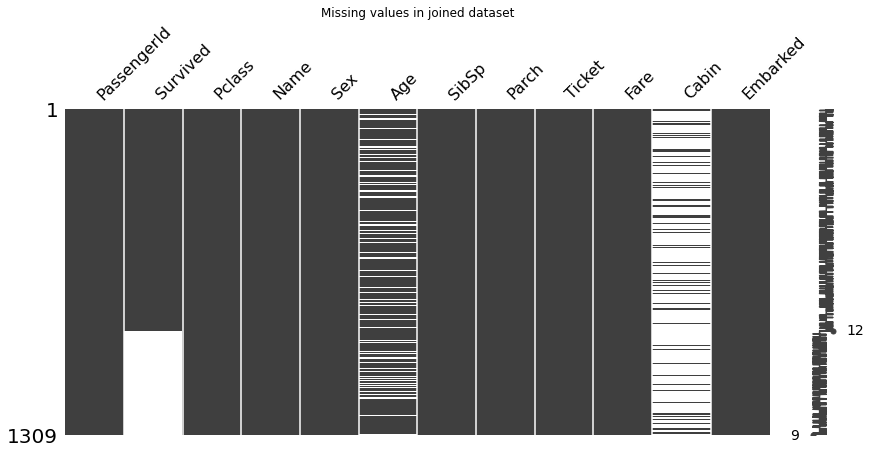

In [15]:
# Summary info of the data
print('Summary information of joined dataset')
display(dataset.info())
print('---'*30)

# Summary statistics
print('Summary statistics for joined dataset')
display(dataset.describe())
print('---'*30)

# Missing data
print('Missing values in joined dataset')
display(dataset.isnull().sum().sort_values(ascending=False))
print('---'*30)

# Missing value percentage
print('Percentage of missing values in joined dataset')
display(round((dataset.isnull().sum() / dataset.shape[0])*100, 2).sort_values(ascending=False))
print('---'*30)

# Visualize missing data joined dataset
_ = mn.matrix(dataset, figsize=(14,6))
_ = plt.title('Missing values in joined dataset')
plt.show()

**Note:** `Cabin` and `Age` has most missing values. `Survived` missing values due to test dataset.

### Explore Feature Variables: Categorical Variable

Variables are Pclass, Sex, Embarked.

***Explore `Pclass` column***

It is ticket class of the passengers. Key `1 = 1st, 2 = 2nd, 3 = 3rd`

It is also a proxy for socio-economic status (SES). `1st = Upper, 2nd = Middle, 3rd = Lower`

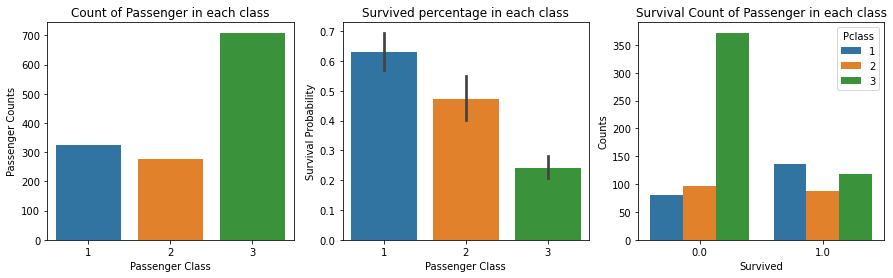

Survival rate of each class


Survived,0.0,1.0
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


In [16]:
_ = plt.figure(figsize=(15,4))

# Plot Pclass counts
_ = plt.subplot(1, 3, 1)
_ = sns.countplot(x='Pclass', data=dataset)
_ = plt.title('Count of Passenger in each class')
_ = plt.xlabel('Passenger Class')
_ = plt.ylabel('Passenger Counts')

# Plot Pclass vs Survived percentage
_ = plt.subplot(1, 3, 2)
_ = sns.barplot(x='Pclass', y='Survived', data=dataset)
_ = plt.title('Survived percentage in each class')
_ = plt.xlabel('Passenger Class')
_ = plt.ylabel('Survival Probability')

# Plot Survival count of Pclass
_ = plt.subplot(1, 3, 3)
_ = sns.countplot(x='Survived', hue='Pclass', data=dataset)
_ = plt.title('Survival Count of Passenger in each class')
_ = plt.xlabel('Survived')
_ = plt.ylabel('Counts')

plt.show()

# Survival rate of each class
print('Survival rate of each class')
display(pd.crosstab(dataset['Pclass'], dataset['Survived']).apply(lambda r : round((r/r.sum())*100,1),axis=1))

Concluded: Passengers in class 3rd is very high as compared to 1st and 2nd class. Survived percentage for 1st class passengers is higher than 2nd and 3rd class.

***Explore `Sex` column***

It is Gender of the passengers.

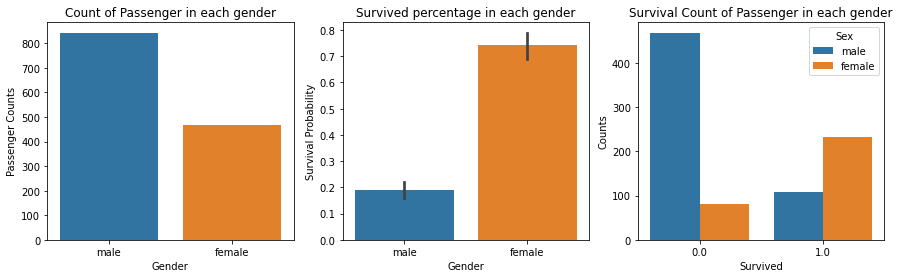

Survival rate of each gender


Survived,0.0,1.0
Sex,,
female,25.8,74.2
male,81.1,18.9


In [17]:
_ = plt.figure(figsize=(15,4))

# Plot Gender distribution
_ = plt.subplot(1,3,1)
_ = sns.countplot(x='Sex', data=dataset)
_ = plt.title('Count of Passenger in each gender')
_ = plt.xlabel('Gender')
_ = plt.ylabel('Passenger Counts')

# Plot Sex vs Survived percentage
_ = plt.subplot(1,3,2)
_ = sns.barplot(x='Sex', y='Survived', data=dataset)
_ = plt.title('Survived percentage in each gender')
_ = plt.xlabel('Gender')
_ = plt.ylabel('Survival Probability')

# Plot Survival count of each Gender
_ = plt.subplot(1, 3, 3)
_ = sns.countplot(x='Survived', hue='Sex', data=dataset)
_ = plt.title('Survival Count of Passenger in each gender')
_ = plt.xlabel('Survived')
_ = plt.ylabel('Counts')

plt.show()

# Survival rate of each gender
print('Survival rate of each gender')
display(pd.crosstab(dataset['Sex'], dataset['Survived']).apply(lambda r : round((r/r.sum())*100,1),axis=1))

Conclude: Male passengers are more onboard than female passengers but survived female passengers percentage are very high than male passengers percentage.

***Explore `Sex` and `Pclass`***

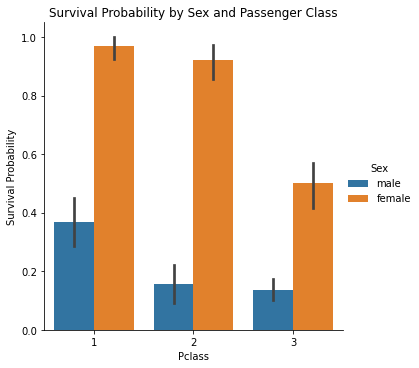

In [18]:
# Survival of gender and passenger class
_ = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=dataset, kind='bar')
_ = plt.title('Survival Probability by Sex and Passenger Class')
_ = plt.ylabel('Survival Probability')
plt.show()

***Explore `Embarked` column***

Port of Embarkation

C = Cherbourg, Q = Queenstown, S = Southampton

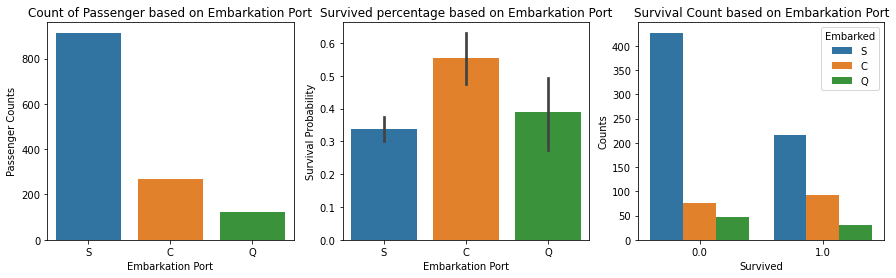

Survival rate with each embarkation point


Survived,0.0,1.0
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.3,33.7


In [19]:
_ = plt.figure(figsize=(15,4))

# Plot Pclass counts
_ = plt.subplot(1, 3, 1)
_ = sns.countplot(x='Embarked', data=dataset)
_ = plt.title('Count of Passenger based on Embarkation Port')
_ = plt.xlabel('Embarkation Port')
_ = plt.ylabel('Passenger Counts')

# Plot Pclass vs Survived percentage
_ = plt.subplot(1, 3, 2)
_ = sns.barplot(x='Embarked', y='Survived', data=dataset)
_ = plt.title('Survived percentage based on Embarkation Port')
_ = plt.xlabel('Embarkation Port')
_ = plt.ylabel('Survival Probability')

# Plot Survival count of Pclass
_ = plt.subplot(1, 3, 3)
_ = sns.countplot(x='Survived', hue='Embarked', data=dataset)
_ = plt.title('Survival Count based on Embarkation Port')
_ = plt.xlabel('Survived')
_ = plt.ylabel('Counts')

plt.show()

# Survival rate with each embarkation point
print('Survival rate with each embarkation point')
display(pd.crosstab(dataset['Embarked'], dataset['Survived']).apply(lambda r : round((r/r.sum())*100,1),axis=1))

**Note:** Survival Probability is higher in `C = Cherbourg` location than `Q = Queenstown` and `S = Southampton`.

**What could be the reason behind this?**

From the above observation, we can also see that majority passengers on boarded from `S = Southampton` location. Also, we know that majority of the passengers are on `3rd class` and chance of survival of `3rd class` is very low than `1st class`, so it could be possible that most `1st class` passengers onboarded from `C = Cherbourg` location and most `3rd class` passengers on boarded from `S = Southampton` location.

Let's explore this.

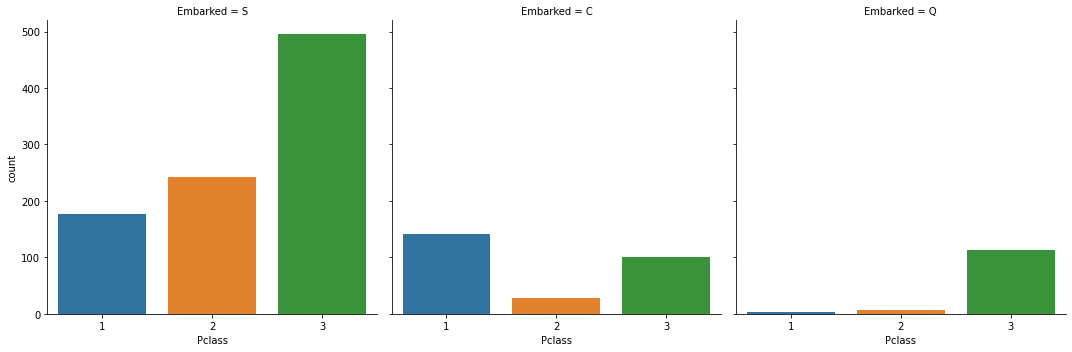

In [20]:
# Plot categorical plot
_ = sns.catplot(x='Pclass', col='Embarked', data=dataset, kind='count')
plt.show()

We can see that most `3rd class` passengers on boarded in `S` location.

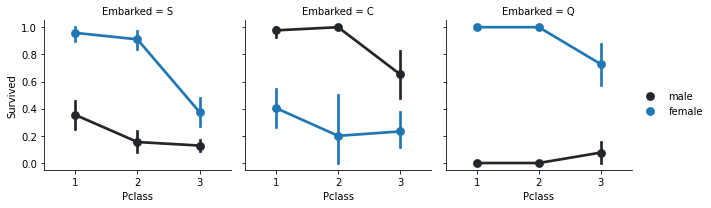

In [21]:
# Survival probability of all categorical variables
grid = sns.FacetGrid(data=dataset, col='Embarked')
grid = grid.map_dataframe(sns.pointplot, x='Pclass', y='Survived', hue='Sex')
grid.add_legend()
plt.show()

### Explore Feature Variables: Numerical Variable

Variables are SibSp, Parch, Age and Fare.

#### Detect and remove outliers in numerical variables

Outliers in data can skew our data towards extreme and can cause inaccurate model predictions. Here I will remove those outliers.

In [22]:
# Function to find outliers
def find_outliers(df, n, features):
    """
    This function will loop through a given list of features and find outliers in each feature.
    A datapoint is an outlier if it is less than (1st quartile - outlier step) or exceeds (3rd quartile + outlier step). 
    Outlier step is 1.5 times the interquartile range.
    After finding the outlier for one feature, their indices will be stored in a list and repeats for all features.
    Finally, count the frequency of index numbers and return if its greater than n times.
    """
    outlier_indices = []
    for col in features:
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        outlier_step = 1.5 * iqr
        outlier_list_col = df[(df[col] < q1 - outlier_step) | (df[col] > q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = [key for key, val in outlier_indices.items() if val > n]
    return multiple_outliers

In [23]:
# find outliers
outliers = find_outliers(dataset, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print('Have to drop this {} indices: '.format(len(outliers)), outliers)

Have to drop this 0 indices:  []


In [24]:
# outliers in train data
dataset.loc[outliers, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [25]:
# # drop outliers and reset index
# print('Before rows: ', dataset.shape[0])
# dataset = dataset.drop(outliers, axis=0).reset_index(drop=True)
# print('After rows: ', dataset.shape[0])

After looking at the outlier data. It is not making sense to delete these records. We can see many correlations like, SibSp = 8 has survival chance zero. Fare high, Pclass 1 survival chance 1. So let's not delete these. We will use scaling methods to normalize the data.

***Explore `Age` column***

Age in years. Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

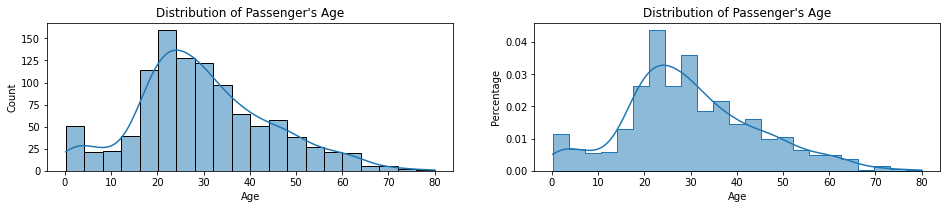

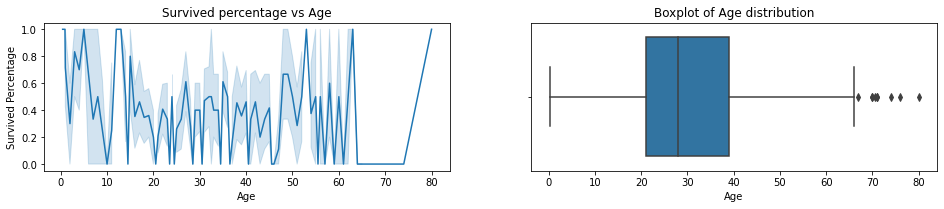

In [26]:
_ = plt.figure(figsize=(16,6))

# Plot Age distribution
_ = plt.subplot(2, 2, 1)
_ = sns.histplot(dataset['Age'], bins=20, kde=True)
_ = plt.title("Distribution of Passenger's Age")
_ = plt.xlabel('Age')
_ = plt.ylabel('Count')

# Plot Age distribution
_ = plt.subplot(2, 2, 2)
_ = sns.histplot(dataset['Age'], stat='density', element='step', kde=True)
_ = plt.title("Distribution of Passenger's Age")
_ = plt.xlabel('Age')
_ = plt.ylabel('Percentage')

_ = plt.figure(figsize=(16,6))

# Plot Age vs Survived Percentage
_ = plt.subplot(2, 2, 3)
_ = sns.lineplot(x='Age', y='Survived', data=dataset)
_ = plt.title('Survived percentage vs Age')
_ = plt.xlabel('Age')
_ = plt.ylabel('Survived Percentage')

# Plot boxplot to see outliers
_ = plt.subplot(2, 2, 4)
_ = sns.boxplot(x='Age', data=dataset)
_ = plt.title('Boxplot of Age distribution')

plt.show()

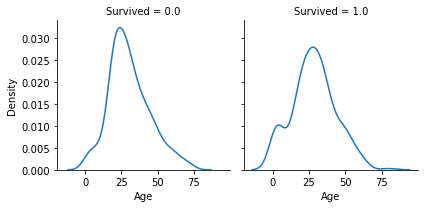

In [27]:
# Age distribution by survival

grid = sns.FacetGrid(dataset, col='Survived')
grid.map(sns.kdeplot, 'Age')

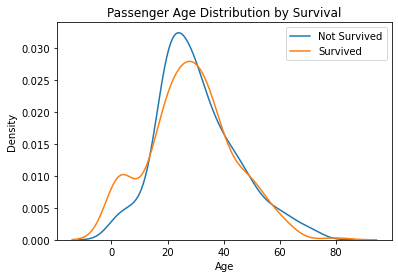

In [28]:
# Plot age distribution by survival
g = sns.kdeplot(dataset['Age'][dataset['Survived'] == 0])
g = sns.kdeplot(dataset['Age'][dataset['Survived'] == 1])
plt.legend(['Not Survived', 'Survived'])
plt.title('Passenger Age Distribution by Survival')
plt.show()

In [29]:
# Check missing value
missing_values = dataset.Age.isnull().sum()
print('Missing values: ', missing_values)

# percentage of missing value
print('Percentage of missing values: ', round((missing_values/dataset.shape[0])*100, 2),'%')

Missing values:  263
Percentage of missing values:  20.09 %


Conclude: Age is also a feature which is impacting survival rate. We can see in the plot that `passengers < age: 14 and passenger > age: 50` have higer survival rate as compared to other. Also we have very less data and percentage of missing values are `approx 20%`, so we cannot delete the records. We will work on the missing data in `Feature Engineering` section.

***Explore `SibSp` column***

Number of siblings / spouses aboard the Titanic

The dataset defines family relations as:
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiances were ignored)

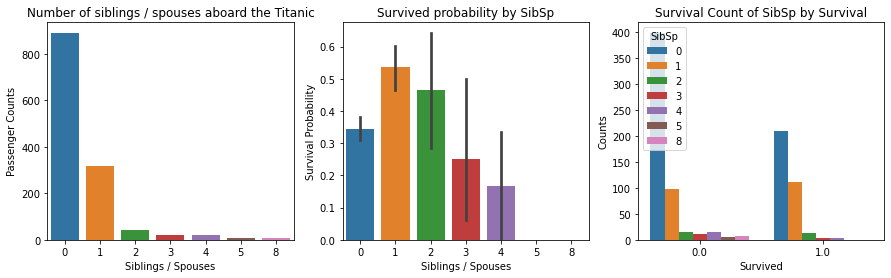

Survival rate of Siblings / Spouses


Survived,0.0,1.0
SibSp,,
0,65.5,34.5
1,46.4,53.6
2,53.6,46.4
3,75.0,25.0
4,83.3,16.7
5,100.0,0.0
8,100.0,0.0


In [30]:
_ = plt.figure(figsize=(15,4))

# Plot SibSp distribution
_ = plt.subplot(1,3,1)
_ = sns.countplot(x='SibSp', data=dataset)
_ = plt.title('Number of siblings / spouses aboard the Titanic')
_ = plt.xlabel('Siblings / Spouses')
_ = plt.ylabel('Passenger Counts')

# Plot SibSp vs Survived percentage
_ = plt.subplot(1,3,2)
_ = sns.barplot(x='SibSp', y='Survived', data=dataset)
_ = plt.title('Survived probability by SibSp')
_ = plt.xlabel('Siblings / Spouses')
_ = plt.ylabel('Survival Probability')

# Plot Survival count of each SibSp
_ = plt.subplot(1, 3, 3)
_ = sns.countplot(x='Survived', hue='SibSp', data=dataset)
_ = plt.title('Survival Count of SibSp by Survival')
_ = plt.xlabel('Survived')
_ = plt.ylabel('Counts')

plt.show()

# Survival rate of Siblings / Spouses
print('Survival rate of Siblings / Spouses')
display(pd.crosstab(dataset['SibSp'], dataset['Survived']).apply(lambda r : round((r/r.sum())*100,1),axis=1))

Conclude: 
* Survival count of single passengers is higher than siblings / spouses, also single passengers much more than siblings / spouses.
* If we look at the percentage of each type of passengers, we can see that chances of survival for single passengers are less than siblings / spouses (1 & 2) but if SibSp increases then it gets decreased.

***Explore `Parch` column***

Number of parents / children aboard the Titanic

The dataset defines family relations as:
* Parent = mother, father
* Child = daughter, son, stepdaugther, stepson

Some children travelled only with a nanny, therefore `parch = 0` for them.

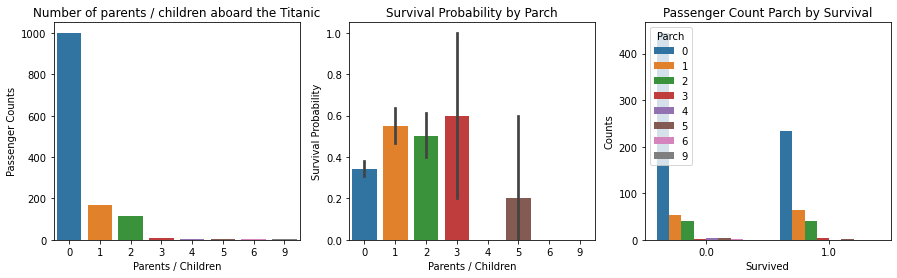

Survival rate of Parents / Children


Survived,0.0,1.0
Parch,,
0,65.6,34.4
1,44.9,55.1
2,50.0,50.0
3,40.0,60.0
4,100.0,0.0
5,80.0,20.0
6,100.0,0.0


In [31]:
_ = plt.figure(figsize=(15,4))

# Plot Parch distribution
_ = plt.subplot(1,3,1)
_ = sns.countplot(x='Parch', data=dataset)
_ = plt.title('Number of parents / children aboard the Titanic')
_ = plt.xlabel('Parents / Children')
_ = plt.ylabel('Passenger Counts')

# Plot Parch vs Survived percentage
_ = plt.subplot(1,3,2)
_ = sns.barplot(x='Parch', y='Survived', data=dataset)
_ = plt.title('Survival Probability by Parch')
_ = plt.xlabel('Parents / Children')
_ = plt.ylabel('Survival Probability')

# Plot Survival count of each Parch
_ = plt.subplot(1, 3, 3)
_ = sns.countplot(x='Survived', hue='Parch', data=dataset)
_ = plt.title('Passenger Count Parch by Survival')
_ = plt.xlabel('Survived')
_ = plt.ylabel('Counts')

plt.show()

# Survival rate of Parents / Children
print('Survival rate of Parents / Children')
display(pd.crosstab(dataset['Parch'], dataset['Survived']).apply(lambda r : round((r/r.sum())*100,1),axis=1))

Conclude: 
* Survival count of single passengers is higher than parents / children, also single passengers much more than parents / children.
* If we look at the percentage of each type of passengers, we can see that chances of survival for single passengers are less than parents / children.

***Explore `Fare` column***

Price of the ticket.

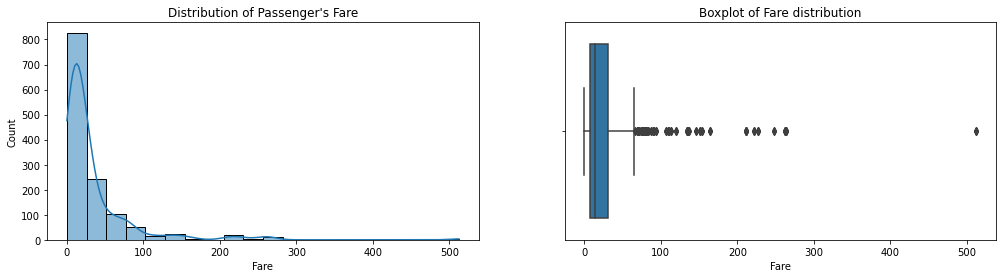

In [32]:
_ = plt.figure(figsize=(17,4))

# Plot Fare distribution
_ = plt.subplot(1, 2, 1)
_ = sns.histplot(dataset['Fare'], bins=20, kde=True)
_ = plt.title("Distribution of Passenger's Fare")
_ = plt.xlabel('Fare')
_ = plt.ylabel('Count')

# Plot boxplot to see outliers
_ = plt.subplot(1, 2, 2)
_ = sns.boxplot(x='Fare', data=dataset)
_ = plt.title('Boxplot of Fare distribution')

plt.show()

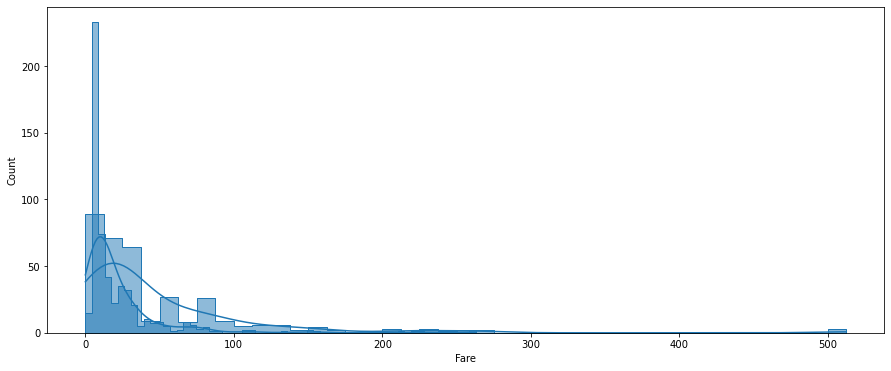

In [33]:
# Survived Distribution with Fare
plt.figure(figsize=(15,6))
sns.histplot(dataset[dataset.Survived==0]['Fare'], element='step', kde=True)
sns.histplot(dataset[dataset.Survived==1]['Fare'], element='step', kde=True)

plt.show()

In [34]:
# percentage of fare less than 100
print('Percentage passengers with fare less than 25 : ',
      dataset[dataset['Fare'] < 25].shape[0] / dataset.shape[0])

print('Percentage passengers with between 26 and 50 : ',
      dataset[(dataset['Fare'] > 25) & (dataset['Fare'] < 50)].shape[0] / dataset.shape[0])

print('Percentage passengers with between 51 and 100 : ',
      dataset[(dataset['Fare'] > 51) & (dataset['Fare'] < 100)].shape[0] / dataset.shape[0])

Percentage passengers with fare less than 25 :  0.627196333078686
Percentage passengers with between 26 and 50 :  0.18716577540106952
Percentage passengers with between 51 and 100 :  0.11764705882352941


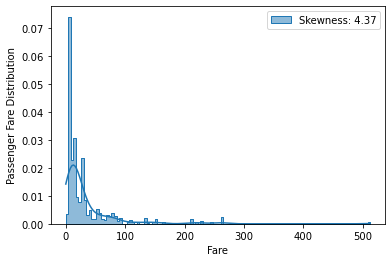

In [35]:
# Percentage fare distibution
_ = sns.histplot(dataset['Fare'], stat='density', element='step', kde=True, 
                 label='Skewness: %.2f'%(dataset['Fare'].skew()))
_ = plt.legend(loc='best')
_ = plt.ylabel('Passenger Fare Distribution')
plt.show()

Conclude: 
* As we have seen above percentage of 3rd class passengers are much higher, we can see here also passengers is are more than 80% with ticket fare less than 100.
* Also we have high skewness in data. We will transform this data using log transformation in `Feature Engineering` section.

***Correleation of Numerical Variables with Survival***

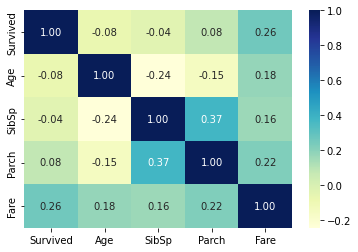

In [36]:
# Plot a heat map with correlation matrix
_ = sns.heatmap(dataset[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']].corr(),
               annot=True, fmt='.2f', cmap='YlGnBu')
plt.show()

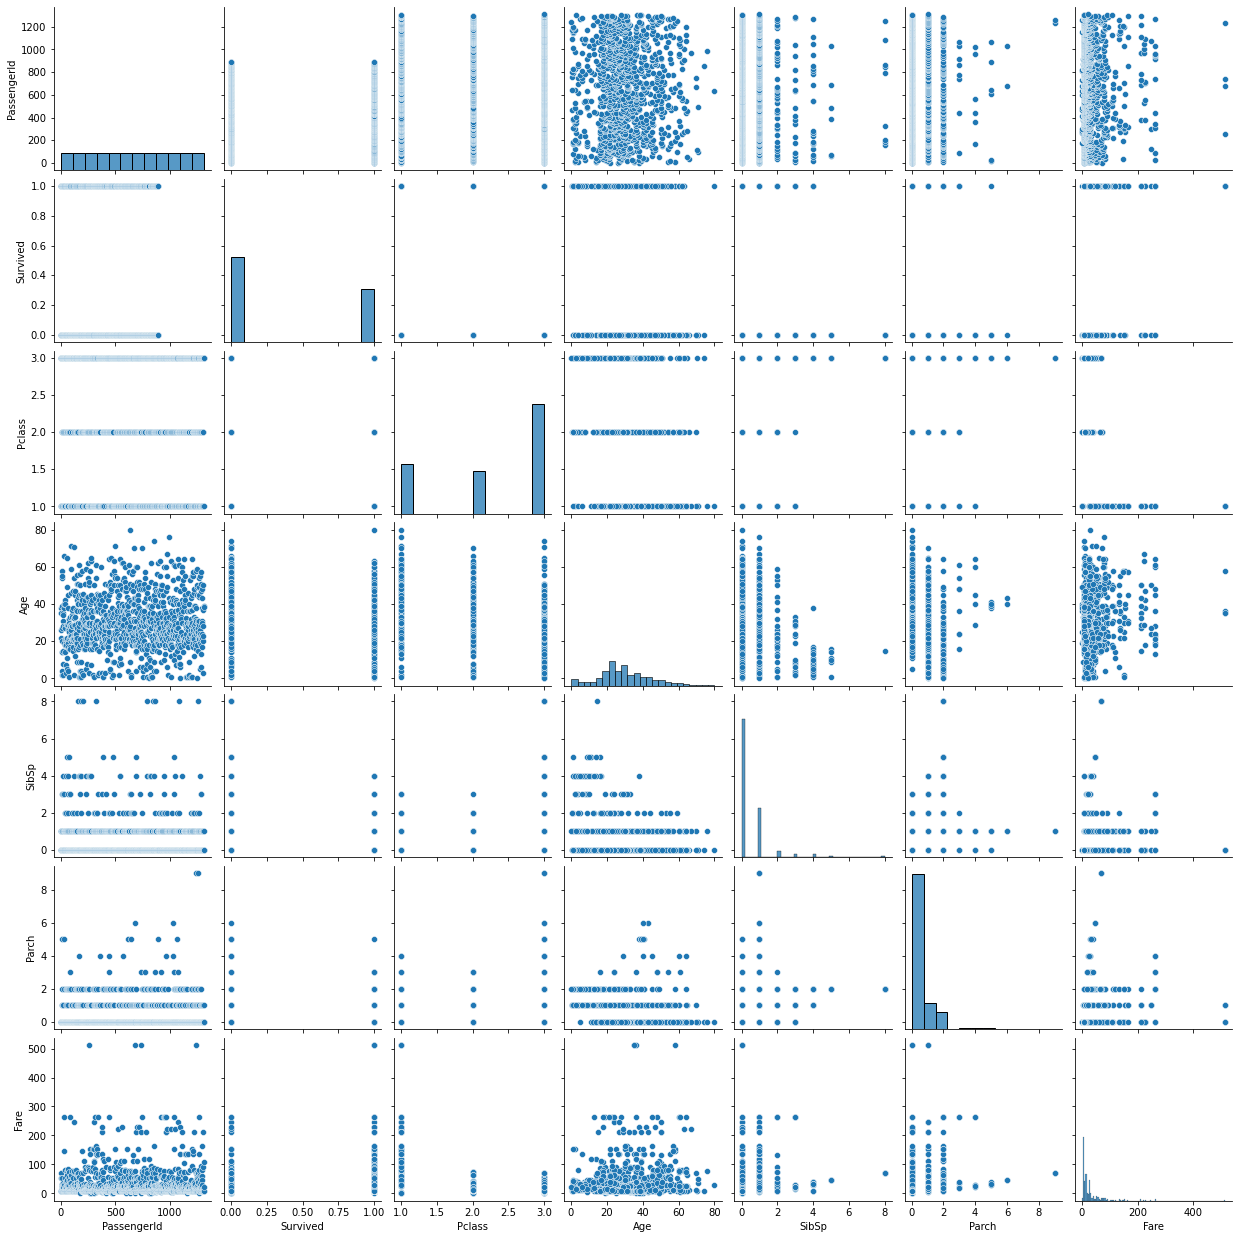

In [37]:
_ = sns.pairplot(dataset)
plt.show()

# Data Preprocessing
* Feature Engineering
* Feature Encoding
* Data Transformation (Scaling of Data)
* Combine all features

Note: As we have very low data points, so I am not dropping any data, instead I am filling missing values using various imputation methods.

***Working with `Pclass` column***

#### Feature Encoding: One Hot Encoding

We will use onehot encoding with `Pclass` column as it is a categorical column. (use get dummies)

In [38]:
# Encoding data using pandas get_dummies
pclass_onehotCoding = pd.get_dummies(dataset['Pclass'], drop_first=True)

In [39]:
pclass_onehotCoding.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [40]:
# Check shape of the data
print('Shape of joined data: ', dataset.shape)
print('Shape of pclass_onehoCoding data: ', pclass_onehotCoding.shape)

Shape of joined data:  (1309, 12)
Shape of pclass_onehoCoding data:  (1309, 2)


***Working with `Name` column***

It is a categorical variable.

#### Feature Engineering

Here I will get the title of each person and create a new variable `Title`. Then explore the relationship of Title with survival rate.

In [41]:
# Get title from `Name`
dataset['Title'] = [name.split(',')[1].split('.')[0].strip() for name in dataset['Name']]

# Get the head data
dataset[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [42]:
# Get unique values
print('Count of unique Title: ', dataset['Title'].nunique())
display(dataset['Title'].unique())


# Get the value counts
display(dataset['Title'].value_counts())

Count of unique Title:  18


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [43]:
# Putting all the titles with lesser count in 1 bucket
dataset['Title'] = dataset.Title.replace(['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 
                                          'Capt', 'the Countess', 'Jonkheer', 'Dona'], 'Rare')

dataset['Title'] = dataset.Title.replace(['Mlle', 'Ms'], 'Miss')
dataset['Title'] = dataset.Title.replace('Mme', 'Mrs')


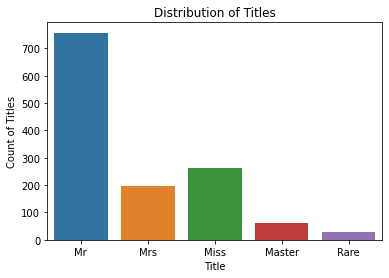

In [44]:
# Plot the Titles
_ = sns.countplot(x='Title', data=dataset)
_ = plt.title('Distribution of Titles')
_ = plt.ylabel('Count of Titles')
_ = plt.xlabel('Title')
plt.show()

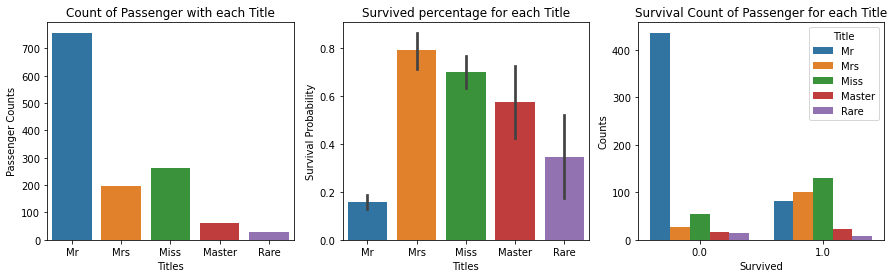

Survival rate of each Title


Survived,0.0,1.0
Title,,
Master,42.5,57.5
Miss,29.7,70.3
Mr,84.3,15.7
Mrs,20.6,79.4
Rare,65.2,34.8


In [45]:
_ = plt.figure(figsize=(15,4))

# Plot Title distribution
_ = plt.subplot(1,3,1)
_ = sns.countplot(x='Title', data=dataset)
_ = plt.title('Count of Passenger with each Title')
_ = plt.xlabel('Titles')
_ = plt.ylabel('Passenger Counts')

# Plot Title vs Survived percentage
_ = plt.subplot(1,3,2)
_ = sns.barplot(x='Title', y='Survived', data=dataset)
_ = plt.title('Survived percentage for each Title')
_ = plt.xlabel('Titles')
_ = plt.ylabel('Survival Probability')

# Plot Survival count of each Title
_ = plt.subplot(1, 3, 3)
_ = sns.countplot(x='Survived', hue='Title', data=dataset)
_ = plt.title('Survival Count of Passenger for each Title')
_ = plt.xlabel('Survived')
_ = plt.ylabel('Counts')

plt.show()

# Survival rate of each Title
print('Survival rate of each Title')
display(pd.crosstab(dataset['Title'], dataset['Survived']).apply(lambda r : round((r/r.sum())*100,1),axis=1))


Conclude: We can see that chances of survival for `Mrs` and `Miss` is very high as compared to other.

#### Feature Encoding: One Hot Encoding

We will use onehot encoding with `Title` column as it is a categorical column. (use get dummies)

In [46]:
# Encoding data using pandas get_dummies
title_onehotCoding = pd.get_dummies(dataset['Title'], drop_first=True)

In [47]:
title_onehotCoding.head()

,Miss,Mr,Mrs,Rare
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


In [48]:
# Check shape of the data
print('Shape of joined data: ', dataset.shape)
print('Shape of title_onehoCoding data: ', title_onehotCoding.shape)

Shape of joined data:  (1309, 13)
Shape of title_onehoCoding data:  (1309, 4)


***Working with `Sex` column***

#### Feature Encoding: One Hot Encoding

We will use onehot encoding with `Sex` column as it is a categorical column. (use get dummies)

In [49]:
# Encoding data using pandas get_dummies
sex_onehotCoding = pd.get_dummies(dataset['Sex'], drop_first=True)

In [50]:
sex_onehotCoding.head()

,male
0,1
1,0
2,0
3,0
4,1


In [51]:
# Check shape of the data
print('Shape of joined data: ', dataset.shape)
print('Shape of sex_onehoCoding data: ', sex_onehotCoding.shape)

Shape of joined data:  (1309, 13)
Shape of sex_onehoCoding data:  (1309, 1)


***Working with `Age` column***

#### Feature Engineering
* Imputation: If we look at the distribution Passenger's age it is densly populated near `mean age`. So we can replace the missing data with `mean age`.
* Transform age into ordinal variable. It is like categorical variable with intrinsic ordering within values.
* Create `Age*Class` feature

***Imputing missing data in `Age` with mean imputation***

In [52]:
# Function to do mean imputation
def impute_nan_mean(df, column, mean):
    df[column + '_mean'] = df[column].fillna(mean)
    return df

In [53]:
mean_val = dataset.Age.mean()
dataset = impute_nan_mean(dataset, 'Age', mean_val)

In [54]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_mean
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,29.881138
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare,39.000000
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,38.500000
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,29.881138
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master,29.881138


In [55]:
dataset.shape

(1309, 14)

In [56]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
Age_mean          0
dtype: int64

In [57]:
# Group Ages into 6 groups
dataset['AgeGroup'] = pd.cut(dataset['Age_mean'], 6)
dataset['AgeGroup'].value_counts()

(26.78, 40.085]     608
(13.475, 26.78]     375
(40.085, 53.39]     150
(0.0902, 13.475]     99
(53.39, 66.695]      68
(66.695, 80.0]        9
Name: AgeGroup, dtype: int64

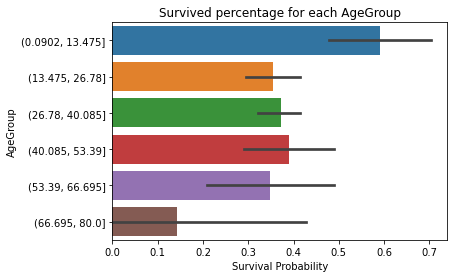

In [58]:
# Plot AgeGroup vs Survived percentage
_ = sns.barplot(x='Survived', y='AgeGroup', data=dataset)
_ = plt.title('Survived percentage for each AgeGroup')
_ = plt.ylabel('AgeGroup')
_ = plt.xlabel('Survival Probability')

In [59]:
# Assign ordinals to each age band 
dataset.loc[dataset['Age_mean'] <= 13.683, 'Age_ordinal'] = 0
dataset.loc[(dataset['Age_mean'] > 13.683) & (dataset['Age_mean'] <= 26.947), 'Age_ordinal'] = 1
dataset.loc[(dataset['Age_mean'] > 26.947) & (dataset['Age_mean'] <= 40.21), 'Age_ordinal'] = 2
dataset.loc[(dataset['Age_mean'] > 40.21) & (dataset['Age_mean'] <= 54.437), 'Age_ordinal'] = 3
dataset.loc[(dataset['Age_mean'] > 54.437) & (dataset['Age_mean'] <= 66.737), 'Age_ordinal'] = 4
dataset.loc[dataset['Age_mean'] > 66.737, 'Age_ordinal'] = 5


In [60]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_mean,AgeGroup,Age_ordinal
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,22.0,"(13.475, 26.78]",1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,38.0,"(26.78, 40.085]",2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,26.0,"(13.475, 26.78]",1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,35.0,"(26.78, 40.085]",2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,35.0,"(26.78, 40.085]",2.0


In [61]:
# Age and Pclass data types 
dataset[['Age_ordinal', 'Pclass']].dtypes

Age_ordinal    float64
Pclass           int64
dtype: object

In [62]:
# Convert Age_ordinal into integer
dataset['Age_ordinal'] = dataset['Age_ordinal'].astype('int')
dataset['Age_ordinal'].dtype

dtype('int64')

In [63]:
# Create Age*Class feature
dataset['Age*Class'] = dataset['Age_ordinal'] * dataset['Pclass']
dataset[['Age_ordinal', 'Pclass', 'Age*Class']].head()

,Age_ordinal,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


#### Feature Encoding: One Hot Encoding

We will use onehot encoding with `Age_ordinal` column as it is a categorical column. (use get dummies)

In [64]:
# Encoding data using pandas get_dummies
age_ordinal_onehotCoding = pd.get_dummies(dataset['Age_ordinal'], drop_first=True)

In [65]:
age_ordinal_onehotCoding.head()

,1,2,3,4,5
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [66]:
# Check shape of the data
print('Shape of joined data: ', dataset.shape)
print('Shape of age_ordinal_onehoCoding data: ', age_ordinal_onehotCoding.shape)

Shape of joined data:  (1309, 17)
Shape of age_ordinal_onehoCoding data:  (1309, 5)


***Working with `SibSp` and `Parch` column***

#### Feature Engineering

Create a new feature `FamilyType`. From above we can see majority of passengers are alone. And it has impact on the survival rate.

In [67]:
# calculate family size from SibSp and Parch
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [68]:
dataset['FamilySize'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

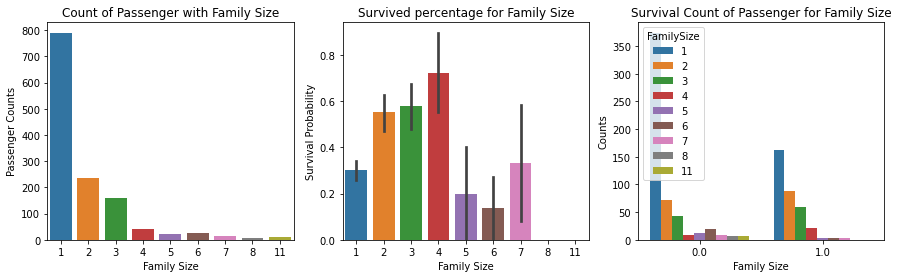

Survival rate of Family Size


Survived,0.0,1.0
FamilySize,,
1,69.6,30.4
2,44.7,55.3
3,42.2,57.8
4,27.6,72.4
5,80.0,20.0
6,86.4,13.6
7,66.7,33.3
8,100.0,0.0
11,100.0,0.0


In [69]:
_ = plt.figure(figsize=(15,4))

# Plot Family Size distribution
_ = plt.subplot(1,3,1)
_ = sns.countplot(x='FamilySize', data=dataset)
_ = plt.title('Count of Passenger with Family Size')
_ = plt.xlabel('Family Size')
_ = plt.ylabel('Passenger Counts')

# Plot Family Size vs Survived percentage
_ = plt.subplot(1,3,2)
_ = sns.barplot(x='FamilySize', y='Survived', data=dataset)
_ = plt.title('Survived percentage for Family Size')
_ = plt.xlabel('Family Size')
_ = plt.ylabel('Survival Probability')

# Plot Survival count of each Family Size
_ = plt.subplot(1, 3, 3)
_ = sns.countplot(x='Survived', hue='FamilySize', data=dataset)
_ = plt.title('Survival Count of Passenger for Family Size')
_ = plt.xlabel('Family Size')
_ = plt.ylabel('Counts')

plt.show()

# Survival rate of each Family Size
print('Survival rate of Family Size')
display(pd.crosstab(dataset['FamilySize'], dataset['Survived']).apply(lambda r : round((r/r.sum())*100,1),axis=1))


Encoding Frequency:
* Family Size with 1 are labeled as **Alone**
* Family Size with 2, 3, 4 are labeled as **Small**
* Family Size with 5, 6 are labeled as **Medium**
* Family Size with 7, 8, 9 are labeled as **Large**

In [70]:
# Create new feature
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 
              7: 'Large', 8: 'Large', 11: 'Large'}

dataset['FamilySize_Group'] = dataset['FamilySize'].map(family_map)

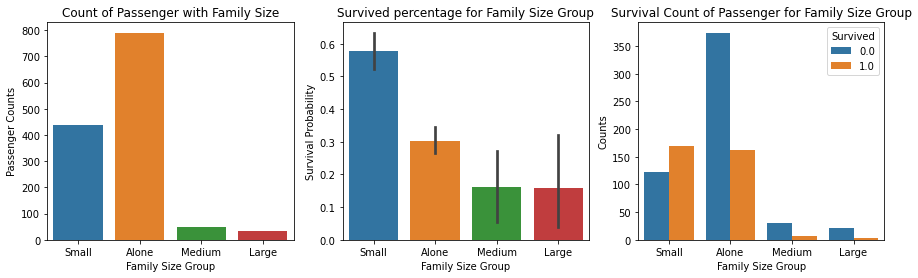

Survival rate of Family Size Group


Survived,0.0,1.0
FamilySize_Group,,
Alone,69.6,30.4
Large,84.0,16.0
Medium,83.8,16.2
Small,42.1,57.9


In [71]:
_ = plt.figure(figsize=(15,4))

# Plot Family Size Group distribution
_ = plt.subplot(1,3,1)
_ = sns.countplot(x='FamilySize_Group', data=dataset)
_ = plt.title('Count of Passenger with Family Size')
_ = plt.xlabel('Family Size Group')
_ = plt.ylabel('Passenger Counts')

# Plot Family Size Group vs Survived percentage
_ = plt.subplot(1,3,2)
_ = sns.barplot(x='FamilySize_Group', y='Survived', data=dataset)
_ = plt.title('Survived percentage for Family Size Group')
_ = plt.xlabel('Family Size Group')
_ = plt.ylabel('Survival Probability')

# Plot Survival count of each Family Size Group
_ = plt.subplot(1, 3, 3)
_ = sns.countplot(x='FamilySize_Group', hue='Survived', data=dataset)
_ = plt.title('Survival Count of Passenger for Family Size Group')
_ = plt.xlabel('Family Size Group')
_ = plt.ylabel('Counts')

plt.show()

# Survival rate of each Family Size Group
print('Survival rate of Family Size Group')
display(pd.crosstab(dataset['FamilySize_Group'], dataset['Survived']).apply(lambda r : round((r/r.sum())*100,1),axis=1))


#### Feature Encoding: One Hot Encoding

We will use onehot encoding with `FamilySize_Group` column as it is a categorical column. (use get dummies)

In [72]:
# Encoding data using pandas get_dummies
family_size_onehotCoding = pd.get_dummies(dataset['FamilySize_Group'], drop_first=True)

In [73]:
family_size_onehotCoding.head()

,Large,Medium,Small
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,1
4,0,0,0


In [74]:
# Check shape of the data
print('Shape of joined data: ', dataset.shape)
print('Shape of family_size_onehotCoding data: ', family_size_onehotCoding.shape)

Shape of joined data:  (1309, 19)
Shape of family_size_onehotCoding data:  (1309, 3)


***Working with `Ticket` column***

##### Feature Engineering

Grouping of `Ticket` column.

In [75]:
dataset['Ticket_Frequencey'] = dataset.groupby('Ticket')['Ticket'].transform('count')

In [76]:
dataset['Ticket_Frequencey'].value_counts()

1     713
2     264
3     147
4      64
5      35
7      35
6      24
8      16
11     11
Name: Ticket_Frequencey, dtype: int64

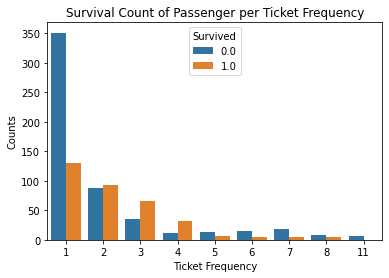

In [77]:
# Plot Survival count of each Family Size Group

_ = sns.countplot(x='Ticket_Frequencey', hue='Survived', data=dataset)
_ = plt.title('Survival Count of Passenger per Ticket Frequency')
_ = plt.xlabel('Ticket Frequency')
_ = plt.ylabel('Counts')

plt.show()

***Working with `Fare` column***

##### Data Transformation (Scaling of Data)

Applying log transformation.

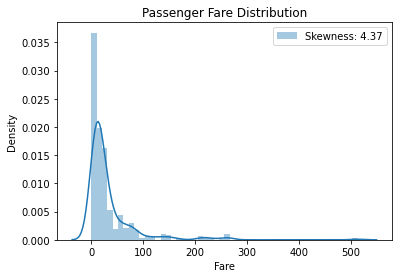

In [78]:
# Passenger Fare distribution
_ = sns.distplot(dataset['Fare'], label='Skewness: %.2f'%(dataset['Fare'].skew()))
_ = plt.legend(loc='best')
_ = plt.title('Passenger Fare Distribution')
plt.show()

In [79]:
# Apply log transformation
dataset['Fare_scaled'] = dataset['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
dataset['Fare_scaled'].head()

0    1.981001
1    4.266662
2    2.070022
3    3.972177
4    2.085672
Name: Fare_scaled, dtype: float64

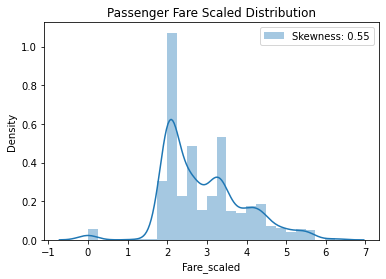

In [80]:
# Passenger Fare_scaled distribution
_ = sns.distplot(dataset['Fare_scaled'], label='Skewness: %.2f'%(dataset['Fare_scaled'].skew()))
_ = plt.legend(loc='best')
_ = plt.title('Passenger Fare Scaled Distribution')
plt.show()

***Working with `Cabin` column***

Cabin Number

#### Feature Engineering

Creating 2 new columns - `Deck` and `Room`

In [81]:
print('Number of rows in joined data: ', dataset.shape[0])
print('Number of missing data in Cabin column: ', dataset['Cabin'].isnull().sum())
print('Percentage of missing data: ', dataset['Cabin'].isnull().sum()/dataset.shape[0])

Number of rows in joined data:  1309
Number of missing data in Cabin column:  1014
Percentage of missing data:  0.774637127578304


In [82]:
dataset['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

From above we can see that in `Cabin` column approx 77% missing data present. So, it is thoughtful to delete this column from the dataset. But because we have very less data in this problem, so I thought of keeping this column. 

Also, most of the cabins consists of single letter at beginning followed by 2 digit or 3 digit numbers. As per our understanding from any cruise ship it is possible that letter represents the deck or section of the ship followed by the room number. We can assume that based which section a passenger is staying can have impact on their chances of survival.

Let's clean the data based on above understanding.

In [83]:
# isolating the non null data
cabin_only = dataset[['Cabin']].copy()
cabin_only['Cabin_data'] = cabin_only['Cabin'].isnull().apply(lambda x: not x)

In [84]:
# take first character and assign it to 'Deck' column
cabin_only['Deck'] = cabin_only['Cabin'].str.slice(0, 1)

# take numerical sequence and assign it to 'Room' column
cabin_only['Room'] = cabin_only['Cabin'].str.slice(1, 5).str.extract('([0-9]+)', expand=False).astype('float')

cabin_only[cabin_only['Cabin_data']]

,Cabin,Cabin_data,Deck,Room
1,C85,True,C,85.0
3,C123,True,C,123.0
6,E46,True,E,46.0
10,G6,True,G,6.0
11,C103,True,C,103.0
...,...,...,...,...
1295,D40,True,D,40.0
1296,D38,True,D,38.0
1298,C80,True,C,80.0
1302,C78,True,C,78.0


In [85]:
cabin_only[cabin_only['Deck']=='F']

,Cabin,Cabin_data,Deck,Room
66,F33,True,F,33.0
75,F G73,True,F,73.0
128,F E69,True,F,69.0
148,F2,True,F,2.0
183,F4,True,F,4.0
193,F2,True,F,2.0
340,F2,True,F,2.0
345,F33,True,F,33.0
516,F33,True,F,33.0
618,F4,True,F,4.0


Mean of Room Numbers:  49.6159169550173
Median of Room Numbers:  43.0


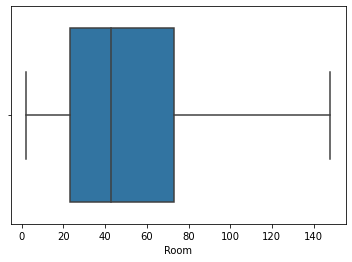

In [86]:
sns.boxplot(x=cabin_only['Room'])
print('Mean of Room Numbers: ', cabin_only['Room'].mean())
print('Median of Room Numbers: ', cabin_only['Room'].median())

In [87]:
# Decks in the ship
cabin_only['Deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

Note:
* Some entries contains multiple cabin rooms and rooms are closser. And in most cases this are belongs to the same deck.
* Some entries contains 2 separate letters where we only get the first letter. But this are very less so ignoring it.

**Dealing with missing data**

Impution with 'N' character in `Deck` column

Imputation using median in `Room` column

In [88]:
# Drop Cabin and Cabin_data columns
cabin_only.drop(['Cabin', 'Cabin_data'], axis=1, inplace=True)

In [89]:
cabin_only

,Deck,Room
0,NaN,NaN
1,C,85.0
2,NaN,NaN
3,C,123.0
4,NaN,NaN
...,...,...
1304,NaN,NaN
1305,C,105.0
1306,NaN,NaN
1307,NaN,NaN


In [90]:
# dealing with missing data

# in Deck column replace the null values with an unused letter
cabin_only['Deck'] = cabin_only['Deck'].fillna('N')

# in Room column replace the null values with median
cabin_only['Room'] = cabin_only['Room'].fillna(cabin_only['Room'].median())

In [91]:
cabin_only.head()

,Deck,Room
0,N,43.0
1,C,85.0
2,N,43.0
3,C,123.0
4,N,43.0


In [92]:
cabin_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Deck    1309 non-null   object 
 1   Room    1309 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.6+ KB


#### Feature Encoding: One Hot Encoding

We will use onehot encoding with `Deck` column as it is a categorical column. (use get dummies)

In [93]:
deck_onehotCoding = pd.get_dummies(cabin_only['Deck'], drop_first=True)

In [94]:
deck_onehotCoding.head()

,B,C,D,E,F,G,N,T
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0


In [95]:
# Check shape of the data
print('Shape of joined data: ', dataset.shape)
print('Shape of deck_onehoCoding data: ', deck_onehotCoding.shape)
print('Shape of the Cabin Room data: ', cabin_only['Room'].shape)

Shape of joined data:  (1309, 21)
Shape of deck_onehoCoding data:  (1309, 8)
Shape of the Cabin Room data:  (1309,)


***Working with `Embarked` column***

#### Feature Engineering

Working with missing values.

In [96]:
# Missing data
dataset.Embarked.isnull().sum()

2

***Imputing missing data in `Embarked` with mode imputation***

In [97]:
# STEP 1: Find Mode Values
mode_embarked = dataset.Embarked.dropna().mode()[0]
mode_embarked

'S'

In [98]:
# STEP 2: Fill Missing Values With Most Frequent Category
dataset['Embarked_mode'] = dataset['Embarked'].fillna(mode_embarked)

# Check For Results
dataset['Embarked_mode'].isnull().sum()

0

#### Feature Encoding: One Hot Encoding

We will use onehot encoding with `Embarked_mode` column as it is a categorical column. (use get dummies)

In [99]:
embarked_onehotCoding = pd.get_dummies(dataset['Embarked_mode'], drop_first=True)

In [100]:
embarked_onehotCoding.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [101]:
# Check shape of the data
print('Shape of joined data: ', dataset.shape)
print('Shape of embarked_onehoCoding data: ', embarked_onehotCoding.shape)

Shape of joined data:  (1309, 22)
Shape of embarked_onehoCoding data:  (1309, 2)


## Combine all the features

In [102]:
all_cols = dataset[['Survived', 'Ticket_Frequencey', 'Fare_scaled']]
all_cols.head()

,Survived,Ticket_Frequencey,Fare_scaled
0,0.0,1,1.981001
1,1.0,2,4.266662
2,1.0,1,2.070022
3,1.0,2,3.972177
4,0.0,1,2.085672


In [103]:
# Renaming columns
pclass_onehotCoding.rename(columns={2:'pclass_1', 3:'pclass_2'}, inplace = True)
title_onehotCoding.rename(columns={'Miss':'title_1', 'Mr':'title_2', 
                                   'Mrs':'title_3', 'Rare':'title_4'}, inplace = True)
sex_onehotCoding.rename(columns={'male': 'sex_1'}, inplace=True)
age_ordinal_onehotCoding.rename(columns={1:'age_1', 2:'age_2', 3:'age_3', 
                                         4:'age_4', 5:'age_5'}, inplace=True)
family_size_onehotCoding.rename(columns={'Large':'family_1', 'Medium':'family_2',
                                        'Small':'family_3'}, inplace=True)
deck_onehotCoding.rename(columns={'B':'deck_1', 'C':'deck_2', 'D':'deck_3',
                                 'E':'deck_4', 'F':'deck_5', 'G':'deck_6',
                                 'N':'deck_7', 'T':'deck_8'}, inplace=True)
embarked_onehotCoding.rename(columns={'Q':'embarked_1', 'S':'embarked_2'}, inplace=True)

In [104]:
final_dataset = pd.concat([all_cols, pclass_onehotCoding, title_onehotCoding, 
               sex_onehotCoding, age_ordinal_onehotCoding, family_size_onehotCoding,
               deck_onehotCoding, embarked_onehotCoding], axis=1)


In [105]:
final_dataset.head()

,Survived,Ticket_Frequencey,Fare_scaled,pclass_1,pclass_2,title_1,title_2,title_3,title_4,sex_1,...,deck_1,deck_2,deck_3,deck_4,deck_5,deck_6,deck_7,deck_8,embarked_1,embarked_2
0,0.0,1,1.981001,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,1.0,2,4.266662,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1.0,1,2.070022,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,2,3.972177,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,1,2.085672,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [106]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    float64
 1   Ticket_Frequencey  1309 non-null   int64  
 2   Fare_scaled        1309 non-null   float64
 3   pclass_1           1309 non-null   uint8  
 4   pclass_2           1309 non-null   uint8  
 5   title_1            1309 non-null   uint8  
 6   title_2            1309 non-null   uint8  
 7   title_3            1309 non-null   uint8  
 8   title_4            1309 non-null   uint8  
 9   sex_1              1309 non-null   uint8  
 10  age_1              1309 non-null   uint8  
 11  age_2              1309 non-null   uint8  
 12  age_3              1309 non-null   uint8  
 13  age_4              1309 non-null   uint8  
 14  age_5              1309 non-null   uint8  
 15  family_1           1309 non-null   uint8  
 16  family_2           1309 

In [107]:
# Check shape of the data
display(final_dataset.shape)


(1309, 28)

# Machine Learning Modeling

In [108]:
## Separate train dataset and test dataset

train_data = final_dataset[:train_len]
test_data = final_dataset[train_len:]
test_data = test_data.drop(['Survived'], axis=1)

In [109]:
print('Number of data points in train data:', train_data.shape)
print('Number of data points in test data:', test_data.shape)


Number of data points in train data: (891, 28)
Number of data points in test data: (418, 27)


In [110]:
# convert 'Survived' column to integer
train_data['Survived'] = train_data.Survived.astype(int)
train_data['Survived'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [111]:
# Separate features and target variable from train_data
X_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']
X_train.head()

,Ticket_Frequencey,Fare_scaled,pclass_1,pclass_2,title_1,title_2,title_3,title_4,sex_1,age_1,...,deck_1,deck_2,deck_3,deck_4,deck_5,deck_6,deck_7,deck_8,embarked_1,embarked_2
0,1,1.981001,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1,2,4.266662,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,2.070022,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,2,3.972177,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,2.085672,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


## Modeling

### Cross Validate Models

Now comparing multiple models and evaluate the mean accuracy using stratified kfold cross validation.
* K Nearest Neighbors Classifier
* Logistic Regression
* Support Vector Classification
* Decision Tree Classifier
* Random Forest
* Extra Tree Classifier
* Ada Boost
* Gradient Boosting
* Linear Discriminant Analysis
* Multi Layer Perceptron (Neural Network)

In [112]:
# cross validate model with Stratified Kfold cross validation
kfold = StratifiedKFold(n_splits=12)

In [113]:
# create list of different algorithms
random_state = 42
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),
                                     random_state=random_state, learning_rate=0.1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(MLPClassifier(random_state=random_state, max_iter=1000))

In [114]:
# Start the stopwatch / counter 
t1_start = process_time() 

# get cross validataion results for all algorithms
cv_results = []

for clf in classifiers:
    cv_results.append(cross_val_score(clf, X_train, y_train, scoring='accuracy',
                                     cv=kfold, n_jobs=4))

# Stop the stopwatch / counter
t1_stop = process_time()

print('Time took for performing Cross Validation of all algorithms: ', 
      t1_stop-t1_start, 'seconds')

Time took for performing Cross Validation of all algorithms:  0.22977599999999931 seconds


In [115]:
# calculate cross validation means and standard deviation for each classifier
cv_means = []
cv_std = []

for res in cv_results:
    cv_means.append(res.mean())
    cv_std.append(res.std())

In [116]:
# create a dataframe with cv results
cv_df = pd.DataFrame({'cross_val_means': cv_means, 'cross_val_errors': cv_std,
                     'algorithm':['KNeighborsClassifier', 'LogisticRegression',
                                 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier',
                                 'ExtraTreesClassifier', 'AdaBoostClassifier',
                                 'GradientBoostingClassifier', 'LinearDiscriminantAnalysis',
                                 'MLPClassifier']})

cv_df.sort_values(by='cross_val_means', ascending=False)

,cross_val_means,cross_val_errors,algorithm
7,0.835045,0.038920,GradientBoostingClassifier
2,0.831622,0.038920,SVC
9,0.829489,0.034919,MLPClassifier
1,0.829459,0.031878,LogisticRegression
8,0.829444,0.032527,LinearDiscriminantAnalysis
0,0.812688,0.033790,KNeighborsClassifier
3,0.803664,0.035468,DecisionTreeClassifier
4,0.798108,0.044255,RandomForestClassifier
6,0.798018,0.039098,AdaBoostClassifier
5,0.795946,0.055615,ExtraTreesClassifier


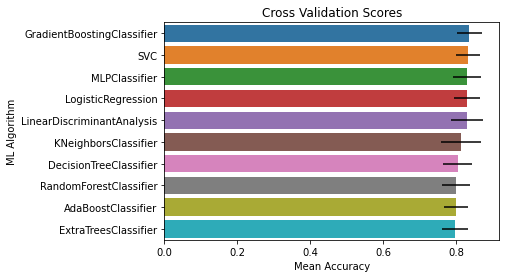

In [117]:
# Plot the cross validation results
_ = sns.barplot(x='cross_val_means', y='algorithm', 
                data=cv_df.sort_values(by='cross_val_means', ascending=False), 
                orient='h', **{'xerr':cv_std})
_ = plt.xlabel('Mean Accuracy')
_ = plt.ylabel('ML Algorithm')
_ = plt.title('Cross Validation Scores')

From all the algorithms, I chose these algorithms, `GradientBoosting, SVC, MLPClassifier, LogisticRegression, LinearDiscriminantAnalysis, RandomForestClassifier` classifiers for the ensemble modeling.

## Hyperparameter tuning for best models

* Perform grid search optimization for `GradientBoosting, SVC, LogisticRegression and LinearDiscriminantAnalysis` classifiers.
* Set the 'n_jobs' parameter to 4 (as per 4 CPU).

In [118]:
# Start the stopwatch / counter 
t1_start = process_time() 

# GradientBoosting tuning
clf1 = GradientBoostingClassifier()
clf1_param = {'loss': ['deviance'],
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.1, 0.05, 0.01],
            'max_depth': [4, 8],
            'min_samples_leaf': [1, 2],
            'max_features': [0.3, 0.1]}

gs_clf1 = GridSearchCV(clf1, param_grid=clf1_param, cv=kfold,
                      scoring='accuracy', n_jobs=4, verbose=True)

gs_clf1.fit(X_train, y_train)

# best estimator
clf1_best = gs_clf1.best_estimator_
display(clf1_best)

# best score
print('Best Score: ', gs_clf1.best_score_)

# Stop the stopwatch / counter
t1_stop = process_time()

print('Time took for performing Gradient Boosting classifier: ', 
      t1_stop-t1_start, 'seconds')

Fitting 12 folds for each of 72 candidates, totalling 864 fits


GradientBoostingClassifier(max_depth=4, max_features=0.3, min_samples_leaf=2)

Best Score:  0.8362162162162162
Time took for performing Gradient Boosting classifier:  1.5052009999999996 seconds


In [119]:
# Start the stopwatch / counter 
t1_start = process_time() 

# SVC classifier tuning
clf2 = SVC(probability=True)

clf2_param = {'kernel': ['rbf'],
             'gamma': [0.001, 0.01, 0.1, 1],
             'C': [1, 10, 50, 100, 200, 300, 1000]}

gs_clf2 = GridSearchCV(clf2, param_grid=clf2_param, cv=kfold,
                      scoring='accuracy', n_jobs=4, verbose=True)

gs_clf2.fit(X_train, y_train)

# best estimator
clf2_best = gs_clf2.best_estimator_
display(clf2_best)

# best score
print('Best Score: ', gs_clf2.best_score_)

# Stop the stopwatch / counter
t1_stop = process_time()

print('Time took for performing SVC classifier: ', 
      t1_stop-t1_start, 'seconds')

Fitting 12 folds for each of 28 candidates, totalling 336 fits


SVC(C=1000, gamma=0.01, probability=True)

Best Score:  0.8317417417417418
Time took for performing SVC classifier:  1.0058969999999992 seconds


In [120]:
# Start the stopwatch / counter 
t1_start = process_time() 

# LogisticRegression classifier tuning
clf3 = LogisticRegression()

clf3_param = {'penalty' : ['l2'],
              'C' : [0.01, 0.1, 1, 10, 100],
              'solver' : ['lbfgs','newton-cg','liblinear'],
              'max_iter': [1000, 2000],
              'intercept_scaling': [1, 2, 3, 4],
              'tol': [0.0001, 0.0002, 0.0003]
             }

gs_clf3 = GridSearchCV(clf3, param_grid=clf3_param, cv=kfold,
                      scoring='accuracy', n_jobs=4, verbose=True)

gs_clf3.fit(X_train, y_train)

# best estimator
clf3_best = gs_clf3.best_estimator_
display(clf3_best)

# best score
print('Best Score: ', gs_clf3.best_score_)

# Stop the stopwatch / counter
t1_stop = process_time()

print('Time took for performing Logistic Regression classifier: ', 
      t1_stop-t1_start, 'seconds')

Fitting 12 folds for each of 360 candidates, totalling 4320 fits


LogisticRegression(C=1, max_iter=1000)

Best Score:  0.8294594594594594
Time took for performing Logistic Regression classifier:  0.9813799999999997 seconds


In [121]:
# Start the stopwatch / counter 
t1_start = process_time() 

# LinearDiscriminantAnalysis classifier tuning
clf4 = LinearDiscriminantAnalysis()

clf4_param = {'solver': ['svd', 'lsqr', 'eigen'],
              'tol': [0.0001, 0.0002, 0.0003]
             }

gs_clf4 = GridSearchCV(clf4, param_grid=clf4_param, cv=kfold,
                      scoring='accuracy', n_jobs=4, verbose=True)

gs_clf4.fit(X_train, y_train)

# best estimator
clf4_best = gs_clf4.best_estimator_
display(clf4_best)

# best score
print('Best Score: ', gs_clf4.best_score_)

# Stop the stopwatch / counter
t1_stop = process_time()

print('Time took for performing Linear Discriminant Analysis classifier: ', 
      t1_stop-t1_start, 'seconds')

Fitting 12 folds for each of 9 candidates, totalling 108 fits


LinearDiscriminantAnalysis()

Best Score:  0.8294444444444444
Time took for performing Linear Discriminant Analysis classifier:  0.43631800000000176 seconds


In [122]:
# Start the stopwatch / counter 
t1_start = process_time() 

# RandomForest classifier tuning
clf5 = RandomForestClassifier()

clf5_param = {'max_depth': [None],
             'max_features': [1, 3, 10],
             'min_samples_split': [2, 3, 10],
             'min_samples_leaf': [1, 3, 10],
             'bootstrap': [False],
             'n_estimators': [100, 300],
             'criterion': ['gini']}

gs_clf5 = GridSearchCV(clf5, param_grid=clf5_param, cv=kfold,
                      scoring='accuracy', n_jobs=4, verbose=True)

gs_clf5.fit(X_train, y_train)

# best estimator
clf5_best = gs_clf5.best_estimator_
display(clf5_best)

# best score
print('Best Score: ', gs_clf5.best_score_)

# Stop the stopwatch / counter
t1_stop = process_time()

print('Time took for performing RandomForest classifier: ', 
      t1_stop-t1_start, 'seconds')

Fitting 12 folds for each of 54 candidates, totalling 648 fits


RandomForestClassifier(bootstrap=False, max_features=1, min_samples_leaf=3,
                       n_estimators=300)

Best Score:  0.8373573573573574
Time took for performing RandomForest classifier:  1.484534 seconds


## Plot Learning Curves

See overfitting effect on the training set and effect of training size on accuracy using Learning curves.

In [123]:
def plot_learning_curves(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate simple plot for the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
                                                           cv=cv, n_jobs=n_jobs,
                                                           train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
            label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
            label='Cross Validation Score')
    plt.legend(loc='best')
    return plt


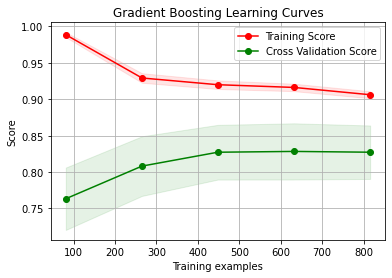

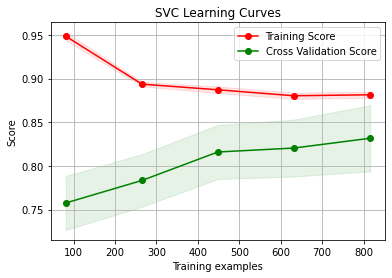

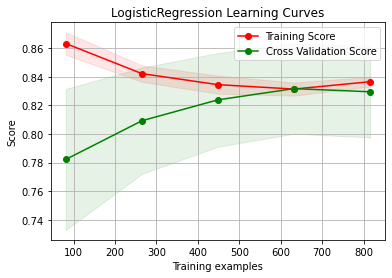

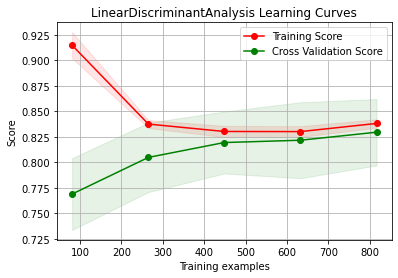

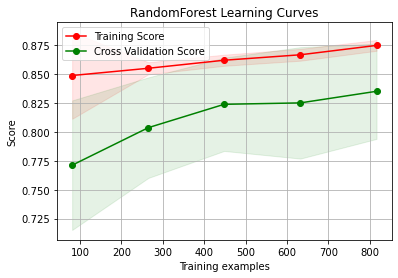

In [124]:
_ = plot_learning_curves(clf1_best, 'Gradient Boosting Learning Curves', 
                         X_train, y_train, cv=kfold)

_ = plot_learning_curves(clf2_best, 'SVC Learning Curves', 
                         X_train, y_train, cv=kfold)

_ = plot_learning_curves(clf3_best, 'LogisticRegression Learning Curves', 
                         X_train, y_train, cv=kfold)

_ = plot_learning_curves(clf4_best, 'LinearDiscriminantAnalysis Learning Curves', 
                         X_train, y_train, cv=kfold)

_ = plot_learning_curves(clf5_best, 'RandomForest Learning Curves', 
                         X_train, y_train, cv=kfold)

##### Typical Features of the learning curve of an overfit model:
* Training score and Validation score are far away from each other.
* Gradually increasing validation score (without flattening) upon adding training examples.
* training score slightly increasing upon adding training examples.

##### Typical Features of the learning curve of an good fit model:
* Training score and validation score are close to each other with training accuracy slightly greater than validation score
* Innitially increasing training and validation score and a pretty flat training and validation score after some point till end.

Note: Gradient Boosting seems to over fit and SVC, LDA, RF seems a good fit model.

## Feature Importance of classifiers

To see most informative features for the prediction of passenger survival, lets plot feature importance

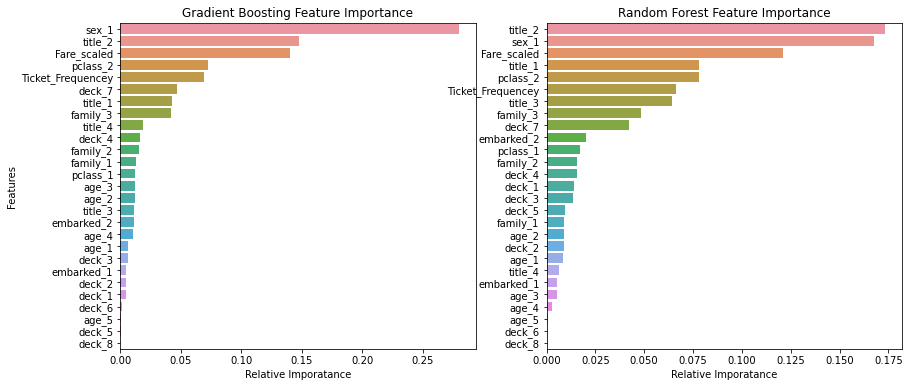

In [125]:
_ = plt.figure(figsize=(14,6))


# Plot feature importance of GradientBoosting
_ = plt.subplot(1,2,1)
indices = np.argsort(clf1_best.feature_importances_)[::-1][:40]
_ = sns.barplot(y=X_train.columns[indices][:40], x=clf1_best.feature_importances_[indices][:40],
               orient='h')
_ = plt.title('Gradient Boosting Feature Importance')
_ = plt.xlabel('Relative Imporatance')
_ = plt.ylabel('Features')

# Plot feature importance of RandomForest
_ = plt.subplot(1,2,2)
indices = np.argsort(clf5_best.feature_importances_)[::-1][:40]
_ = sns.barplot(y=X_train.columns[indices][:40], x=clf5_best.feature_importances_[indices][:40],
               orient='h')
_ = plt.title('Random Forest Feature Importance')
_ = plt.xlabel('Relative Imporatance')

Above 2 classifiers has same top 3 features according to relative importance. They share common features for classification.

Also we can say:
* pclass_1, pclass_2 and Fare_scaled refer to the general social standing of passengers.
* family_1, family_2, family_3 refer to the size of the passenger family.

In [126]:
test_data.head()

,Ticket_Frequencey,Fare_scaled,pclass_1,pclass_2,title_1,title_2,title_3,title_4,sex_1,age_1,...,deck_1,deck_2,deck_3,deck_4,deck_5,deck_6,deck_7,deck_8,embarked_1,embarked_2
891,1,2.057860,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
892,1,1.945910,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
893,1,2.270836,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
894,1,2.159003,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
895,2,2.508582,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1


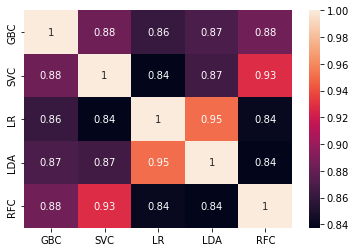

In [127]:
y_pred_clf1 = pd.Series(clf1_best.predict(test_data), name='GBC')
y_pred_clf2 = pd.Series(clf2_best.predict(test_data), name='SVC')
y_pred_clf3 = pd.Series(clf3_best.predict(test_data), name='LR')
y_pred_clf4 = pd.Series(clf4_best.predict(test_data), name='LDA')
y_pred_clf5 = pd.Series(clf5_best.predict(test_data), name='RFC')

# Concatenate all classifier results
ensemble_results = pd.concat([y_pred_clf1, y_pred_clf2,
                             y_pred_clf3, y_pred_clf4,
                             y_pred_clf5], axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

The prediction seems to be quite similar for the 5 classifiers.

The 5 classifiers give more or less the same prediction but there is some differences. Theses differences between the 5 classifier predictions are sufficient to consider an ensembling vote.

## Ensemble Modeling

## Combining Models

Using a voting classifier to combine the predictions from 5 classifiers. Pass 'soft' argument to voting parameter to take into account of probability of each vote.

In [128]:
# create a voting classifier

voting_clf = VotingClassifier(estimators=[('gbc', clf1_best), ('svc', clf2_best),
                                         ('lr', clf3_best), ('lda', clf4_best),
                                         ('rfc', clf5_best)], voting='soft', n_jobs=4)

voting_clf = voting_clf.fit(X_train, y_train)


## Prediction

### Predict and Submit Results

In [129]:
# Prediction using voting classifier
y_pred = pd.Series(voting_clf.predict(test_data), name='Survived')

# Create results dataframe with PassengerID, Survived column
results = pd.concat([testID, y_pred], axis=1)

results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [130]:
# Save the results to csv file
# results.to_csv('titanic_submission.csv', index=False)